# BenMAP Exports Exploration
Jupyter notebook for exploring the health impact function inputs that were provided from BenMAP.

Libby Koolik

**Goal**: open each export file and determine structure, granularity, etc., in order to provide a concise list of questions to OEHHA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

/Users/libbykoolik/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


----
## Population Datasets
There are four population datasets provided by OEHHA:
* `CMAQ 12km Nation - Clipped.csv`
* `InMAP Grid.csv`
* `United States Census - County.csv`
* `Woods and Poole.csv`

In this section, I will explore each one of these datasets and take note of outstanding questions.

In [2]:
pop_cmaq_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Population_Datasets/CMAQ 12km Nation - Clipped.csv'
pop_inmap_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Population_Datasets/InMAP Grid.csv'
pop_uscb_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Population_Datasets/United States Census - County.csv'
pop_wp_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Population_Datasets/Woods And Poole.csv'

Import these files and compare columns. I believe columns are the same, but it is good to confirm.

In [3]:
# Read in all four files
pop_cmaq = pd.read_csv(pop_cmaq_fp)
pop_inmap = pd.read_csv(pop_inmap_fp)
pop_uscb = pd.read_csv(pop_uscb_fp)
pop_wp = pd.read_csv(pop_wp_fp)

# Check that columns are equivalent
print(set(pop_cmaq.columns)==set(pop_inmap.columns))
print(set(pop_cmaq.columns)==set(pop_uscb.columns))
print(set(pop_cmaq.columns)==set(pop_wp.columns))

True
True
True


Set up a function for reporting granularity

In [4]:
def pop_exploration(pop_df):
    ''' Reports important metrics for understanding granularity '''
    print('Shape of dataset: {}, {}'.format(pop_df.shape[0],pop_df.shape[1]))
    print('Unique Races: '+', '.join(list(pop_df['Race'].unique())))
    print('Unique Genders: '+', '.join(list(pop_df['Gender'].unique())))
    print('Unique AgeRanges: '+', '.join(list(pop_df['AgeRange'].unique())))
    print('Unique Ethnicities: '+', '.join(list(pop_df['Ethnicity'].unique())))
    print('Number of Unique Years: {}'.format(len(pop_df['Year'].unique())))
    print('Number of Unique Rows: {}'.format(len(pop_df['Row'].unique())))
    print('Number of Unique Columns: {}'.format(len(pop_df['Column'].unique())))
    print('Unique Race/Ethnicity Combinations: {}'.format(len(pop_df[['Race', 'Ethnicity']].drop_duplicates())))
    print('Unique Row/Column Combinations: {}'.format(len(pop_df[['Row', 'Column']].drop_duplicates())))
    return

### (1) CMAQ 12km Nation - Clipped.csv

In [5]:
# View first five rows
pop_cmaq.head()

,Race,Gender,AgeRange,Ethnicity,Year,Row,Column,Population
0,WHITE,MALE,0TO0,HISPANIC,2010,81,281,39.884560
1,BLACK,MALE,0TO0,HISPANIC,2010,81,281,2.531863
2,NATAMER,MALE,0TO0,HISPANIC,2010,81,281,0.303268
3,ASIAN,MALE,0TO0,HISPANIC,2010,81,281,0.307870
4,WHITE,MALE,1TO4,HISPANIC,2010,81,281,164.412048


Based on the top few rows, it looks like this population data granularity is population per race/ethnicity and gender per CMAQ grid cell? Let's explore more.

In [6]:
pop_exploration(pop_cmaq)

Shape of dataset: 7476797, 8
Unique Races: WHITE, BLACK, NATAMER, ASIAN
Unique Genders: MALE, FEMALE
Unique AgeRanges: 0TO0, 1TO4, 5TO9, 10TO14, 15TO19, 20TO24, 25TO29, 30TO34, 35TO39, 40TO44, 45TO49, 50TO54, 55TO59, 60TO64, 65TO69, 70TO74, 75TO79, 80TO84, 85UP
Unique Ethnicities: HISPANIC, NON-HISPANIC
Number of Unique Years: 1
Number of Unique Rows: 241
Number of Unique Columns: 384
Unique Race/Ethnicity Combinations: 8
Unique Row/Column Combinations: 47798


It is also helpful to visualize the distribution of population here.

Total Population: 306675006.0338006
Minimum Population: 8.78168339113472e-06
Maximum Population: 50534.92578125


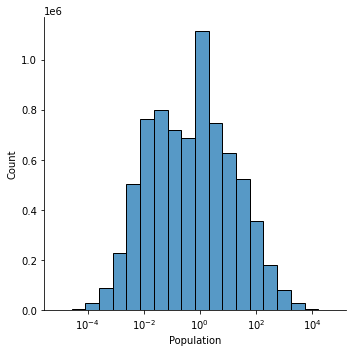

In [7]:
print('Total Population: {}'.format(pop_cmaq['Population'].sum()))
print('Minimum Population: {}'.format(pop_cmaq['Population'].min()))
print('Maximum Population: {}'.format(pop_cmaq['Population'].max()))

sns.displot(data=pop_cmaq, x='Population', kind='hist',bins=20,log_scale=True);

### (2) InMAP Grid.csv

In [8]:
# View first five rows
pop_inmap.head()

,Race,Gender,AgeRange,Ethnicity,Year,Row,Column,Population
0,WHITE,MALE,0TO0,HISPANIC,2010,20250,1,0.230851
1,BLACK,MALE,0TO0,HISPANIC,2010,20250,1,0.003007
2,NATAMER,MALE,0TO0,HISPANIC,2010,20250,1,0.000716
3,ASIAN,MALE,0TO0,HISPANIC,2010,20250,1,0.000720
4,WHITE,MALE,1TO4,HISPANIC,2010,20250,1,0.731180


Based on the top few rows, it looks like this population data granularity is population per race/ethnicity and gender per InMAP grid cell? Let's explore more.

In [9]:
pop_exploration(pop_inmap)

Shape of dataset: 4854136, 8
Unique Races: WHITE, BLACK, NATAMER, ASIAN
Unique Genders: MALE, FEMALE
Unique AgeRanges: 0TO0, 1TO4, 5TO9, 15TO19, 25TO29, 35TO39, 45TO49, 50TO54, 70TO74, 20TO24, 55TO59, 60TO64, 30TO34, 40TO44, 65TO69, 75TO79, 80TO84, 85UP, 10TO14
Unique Ethnicities: HISPANIC, NON-HISPANIC
Number of Unique Years: 1
Number of Unique Rows: 19444
Number of Unique Columns: 1
Unique Race/Ethnicity Combinations: 8
Unique Row/Column Combinations: 19444


Review the total population and distribution

Total Population: 41119022.34639041
Minimum Population: 1.76049998117378e-05
Maximum Population: 2587.81909179688


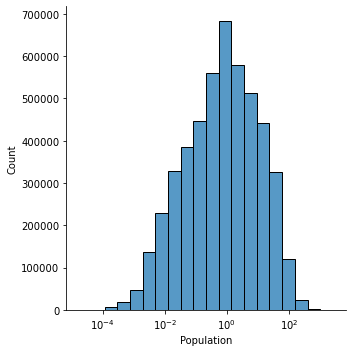

In [10]:
print('Total Population: {}'.format(pop_inmap['Population'].sum()))
print('Minimum Population: {}'.format(pop_inmap['Population'].min()))
print('Maximum Population: {}'.format(pop_inmap['Population'].max()))

sns.displot(data=pop_inmap, x='Population', kind='hist',bins=20,log_scale=True);

Out of curiosity, does this population file match my InMAP IDs?

In [11]:
# Read in isrm file
isrm = gpd.read_file('/Users/libbykoolik/Documents/Research/OEHHA Project/scripts/isrm_health_calculations/data/InMAP_gridCells.shp')

In [12]:
# Combine datasets into one geodataframe
combine = pd.merge(pop_inmap.groupby(['Row'])['Population'].sum().reset_index(), isrm, left_on='Row', right_on='JoinID')
combine_gdf = gpd.GeoDataFrame(combine)

In [13]:
# Update population to be normalized by area for more appropriate mapping
combine_gdf['Area'] = combine_gdf.geometry.area
combine_gdf['Pop/Area'] = combine_gdf['Population']/combine_gdf['Area']

In [14]:
# California will help
ca = gpd.read_file('/Users/libbykoolik/Documents/Research/OEHHA Project/scripts/isrm_health_calculations/data/CA_State_TIGER2016.shp')
ca = ca.to_crs(isrm.crs)

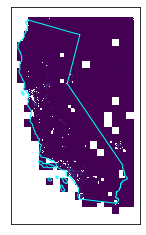

In [15]:
# Plot this as a map using population to shade
fig, ax = plt.subplots(1,1)
combine_gdf.plot(column='Pop/Area', ax=ax);
ca.plot(facecolor='none',edgecolor='cyan',ax=ax);
ax.xaxis.set_visible(False);
ax.yaxis.set_visible(False);

This looks like California and the western US? It's not super clear, so I should follow up.

### (3) United States Census - County.csv

In [16]:
# View first five rows
pop_uscb.head()

,Race,Gender,AgeRange,Ethnicity,Year,Row,Column,Population
0,WHITE,MALE,0TO0,HISPANIC,2010,73,1,324.555267
1,BLACK,MALE,0TO0,HISPANIC,2010,73,1,23.082108
2,NATAMER,MALE,0TO0,HISPANIC,2010,73,1,12.171403
3,ASIAN,MALE,0TO0,HISPANIC,2010,73,1,3.191214
4,WHITE,MALE,1TO4,HISPANIC,2010,73,1,1225.732788


Based on the top few rows, it looks like this population data granularity is population per race/ethnicity and gender per county? Let's explore more.

In [17]:
pop_exploration(pop_uscb)

Shape of dataset: 832702, 8
Unique Races: WHITE, BLACK, NATAMER, ASIAN
Unique Genders: MALE, FEMALE
Unique AgeRanges: 0TO0, 1TO4, 5TO9, 10TO14, 15TO19, 20TO24, 25TO29, 30TO34, 35TO39, 40TO44, 45TO49, 50TO54, 55TO59, 60TO64, 65TO69, 70TO74, 75TO79, 80TO84, 85UP
Unique Ethnicities: HISPANIC, NON-HISPANIC
Number of Unique Years: 1
Number of Unique Rows: 301
Number of Unique Columns: 49
Unique Race/Ethnicity Combinations: 8
Unique Row/Column Combinations: 3109


**How did this get 3,109?** According to the US Census Bureau, there are 3,243 county/county-equivalents in the US. There are 3,007 counties and 236 other first-order administrative divisions (including 100 in territories). The 50 states alone contain 3,142 counties and equivalents. I am assuming this dataset includes only continental US (i.e., no Alaska, Hawaii, or territories).

$$\underbrace{3,142}_{\mathrm{50\,states}}-\underbrace{29}_{\mathrm{Alaska}}-\underbrace{4}_{\mathrm{Hawaii}}=3,109$$

Do the row or column numbers have meaning?

In [18]:
print('Rows go from {} to {}'.format(pop_uscb['Row'].min(), pop_uscb['Row'].max()))
print('Columns go from {} to {}'.format(pop_uscb['Column'].min(), pop_uscb['Column'].max()))

Rows go from 1 to 840
Columns go from 1 to 56


Rows and columns are integers and do not include all possible integers. Will need a key to decode where these are.

Finally, let's look at total, max and min.

Total Population: 306675006.02461934
Minimum Population: 0.0048609371297061
Maximum Population: 214063.890625


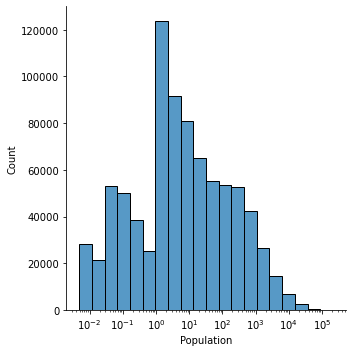

In [19]:
print('Total Population: {}'.format(pop_uscb['Population'].sum()))
print('Minimum Population: {}'.format(pop_uscb['Population'].min()))
print('Maximum Population: {}'.format(pop_uscb['Population'].max()))

sns.displot(data=pop_uscb, x='Population', kind='hist',bins=20,log_scale=True);

How does total population compare to the CMAQ grid?

In [20]:
pop_uscb['Population'].sum()/pop_cmaq['Population'].sum()

0.999999999970062

### (4) Woods and Poole.csv

In [21]:
# View first five rows
pop_wp.head()

,Race,Gender,AgeRange,Ethnicity,Year,Row,Column,Population
0,NATAMER,MALE,85UP,HISPANIC,2013,1,1,5.000000
1,BLACK,FEMALE,45TO49,NON-HISPANIC,2019,1,1,1.264045
2,ASIAN,MALE,85UP,HISPANIC,2024,1,1,10.000000
3,BLACK,FEMALE,10TO14,NON-HISPANIC,2018,1,1,0.939110
4,BLACK,FEMALE,45TO49,HISPANIC,2003,1,1,0.530612


Take a look at the granularity of the Woods and Poole data:

In [22]:
pop_exploration(pop_wp)

Shape of dataset: 48868608, 8
Unique Races: NATAMER, BLACK, ASIAN, WHITE
Unique Genders: MALE, FEMALE
Unique AgeRanges: 85UP, 45TO49, 10TO14, 30TO34, 60TO64, 1TO4, 0TO0, 80TO84, 20TO24, 35TO39, 65TO69, 25TO29, 15TO19, 70TO74, 55TO59, 50TO54, 5TO9, 75TO79, 40TO44
Unique Ethnicities: HISPANIC, NON-HISPANIC
Number of Unique Years: 51
Number of Unique Rows: 329
Number of Unique Columns: 51
Unique Race/Ethnicity Combinations: 8
Unique Row/Column Combinations: 3152


How do the rows and columns of this compare to the county dataset?

In [23]:
print('Rows go from {} to {}'.format(pop_wp['Row'].min(), pop_wp['Row'].max()))
print('Columns go from {} to {}'.format(pop_wp['Column'].min(), pop_wp['Column'].max()))

Rows go from 1 to 840
Columns go from 1 to 56


Rows and columns are integers and do not include all possible integers. Will need a key to decode where these are.

Finally, let's look at total, max and min. Because some cells do have zero population, filter for only the cells greater than zero to keep it in log space.

Total Population: 100375956.25075427
Minimum Population: 0.0
Maximum Population: 271.0


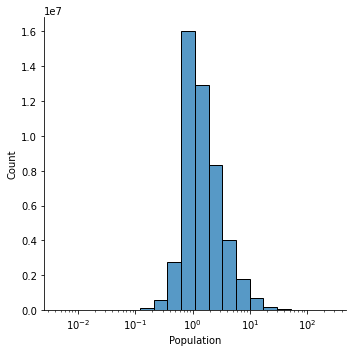

In [24]:
print('Total Population: {}'.format(pop_wp['Population'].sum()))
print('Minimum Population: {}'.format(pop_wp['Population'].min()))
print('Maximum Population: {}'.format(pop_wp['Population'].max()))

sns.displot(data=pop_wp[pop_wp['Population']>0], x='Population', kind='hist',bins=20,log_scale=True);

To keep this notebook lightweight, delete the large dataframes.

In [25]:
del pop_cmaq, pop_inmap, pop_uscb, pop_wp

----

## Incidence Datasets
There are four population dataset types provided by OEHHA:
* `Mortality Incidence (20xx).csv`
* `National Incidence & Prevalence (2021).csv`
* `Prevalence (2008).csv`
* `Race-Stratified Mortality Incidence (2007-16).csv`

In this section, I will explore each one of these datasets and take note of outstanding questions.

In [26]:
# Get the filepaths for each dataset (use 2000 as example for the Mortality Incidence files)
inc_mort_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Incidence_Prevlance_Datasets/Mortality Incidence (2000).csv'
inc_natl_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Incidence_Prevlance_Datasets/National Incidence & Prevalence (2021).csv'
inc_prev_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Incidence_Prevlance_Datasets/Prevalence (2008).csv'
inc_rsmi_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Incidence_Prevlance_Datasets/Race-Stratified Mortality Incidence (2007-16).csv'

# Read in each file
inc_mort = pd.read_csv(inc_mort_fp)
inc_natl = pd.read_csv(inc_natl_fp)
inc_prev = pd.read_csv(inc_prev_fp)
inc_rsmi = pd.read_csv(inc_rsmi_fp)

Are these columns also the same?

In [27]:
# Check that columns are equivalent
print(set(inc_mort.columns)==set(inc_natl.columns))
print(set(inc_mort.columns)==set(inc_prev.columns))
print(set(inc_mort.columns)==set(inc_rsmi.columns))

True
True
True


Create a set of functions for understanding granularity of these datasets.

In [28]:
def inc_field_print(inc_df,field):
    ''' Simplifies the try and except functionality of the printing statements '''
    try:
        print('Unique {} Values: '.format(field)+'; '.join(list(inc_df[field].unique().astype(str))))
    except:
        print('Only one {} Value: {}'.format(field, inc_df[field].unique()[0]))
    return

def inc_exploration(inc_df):
    ''' Reports important metrics for understanding granularity '''
    # First, return the shape of the overall dataset
    print('Shape of dataset: {}, {}'.format(inc_df.shape[0],inc_df.shape[1]))
    
    # Use the helper function to report the unique values of columns
    inc_field_print(inc_df, 'Endpoint Group')
    inc_field_print(inc_df, 'Endpoint')
    inc_field_print(inc_df, 'Race')
    inc_field_print(inc_df, 'Gender')
    inc_field_print(inc_df, 'Ethnicity')
    inc_field_print(inc_df, 'Start Age')
    inc_field_print(inc_df, 'End Age')
    inc_field_print(inc_df, 'Type')
    
    # Handle rows and columns a little differently
    print('Number of Unique Rows: {}'.format(len(inc_df['Row'].unique())))
    print('Number of Unique Columns: {}'.format(len(inc_df['Column'].unique())))
    print('Unique Race/Ethnicity Combinations: {}'.format(len(inc_df[['Race', 'Ethnicity']].drop_duplicates())))
    print('Unique Row/Column Combinations: {}'.format(len(inc_df[['Row', 'Column']].drop_duplicates())))
    
    return

### (1) Mortality Incidence (2000).csv
OEHHA provided files named `Mortality Incidence (20XX).csv` for every five years starting in 2000 and ending in 2060. For this exercise, I'll use the 2000 dataset.

Look at the first five rows of the data:

In [29]:
inc_mort.head()

,Endpoint Group,Endpoint,Race,Gender,Ethnicity,Start Age,End Age,Type,Column,Row,Value
0,Mortality,"Mortality, All Cause",NaN,NaN,NaN,0,0,Incidence,1,1,0.003529
1,Mortality,"Mortality, All Cause",NaN,NaN,NaN,0,0,Incidence,1,3,0.003972
2,Mortality,"Mortality, All Cause",NaN,NaN,NaN,0,0,Incidence,1,5,0.003529
3,Mortality,"Mortality, All Cause",NaN,NaN,NaN,0,0,Incidence,1,7,0.003529
4,Mortality,"Mortality, All Cause",NaN,NaN,NaN,0,0,Incidence,1,9,0.003529


Use the exploration function to peek at granularity:

In [30]:
inc_exploration(inc_mort)

Shape of dataset: 217630, 11
Unique Endpoint Group Values: Mortality
Unique Endpoint Values: Mortality, All Cause; Mortality, Cardiopulmonary; Mortality, Chronic Lung; Mortality, Ischemic Heart Disease; Mortality, Lung Cancer; Mortality, Non-Accidental; Mortality, Respiratory
Unique Race Values: nan
Unique Gender Values: nan
Unique Ethnicity Values: nan
Unique Start Age Values: 0; 1; 18; 25; 35; 45; 55; 65; 75; 85
Unique End Age Values: 0; 17; 24; 34; 44; 54; 64; 74; 84; 99
Unique Type Values: Incidence 
Number of Unique Rows: 301
Number of Unique Columns: 49
Unique Race/Ethnicity Combinations: 1
Unique Row/Column Combinations: 3109


This dataset has a breakdown in mortality endpoint but not for different ages. It has some geographic (??) information in the 3,109 row and column combinations. How do the rows and columns increment?

In [31]:
print('Rows go from {} to {}'.format(inc_mort['Row'].min(), inc_mort['Row'].max()))
print('Columns go from {} to {}'.format(inc_mort['Column'].min(), inc_mort['Column'].max()))

Rows go from 1 to 840
Columns go from 1 to 56


The rows and columns increment the same way as the US Census and Woods and Poole datasets. 

Let's look at the range of values.

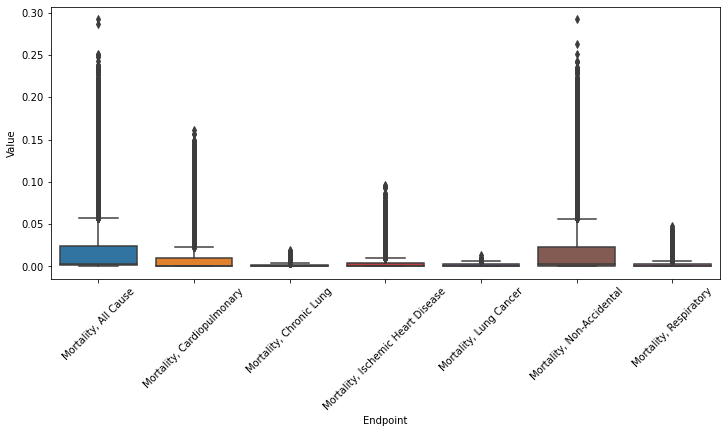

In [32]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.boxplot(data=inc_mort, x='Endpoint', y='Value', ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

### (2) National Incidence & Prevalence (2021).csv
Look at the first five rows of the data:

In [33]:
# View the first five rows
inc_natl.head()

,Endpoint Group,Endpoint,Race,Gender,Ethnicity,Start Age,End Age,Type,Column,Row,Value
0,"Incidence, Respiratory","Incidence, Asthma",NaN,NaN,NaN,0,4,Incidence,1,1,0.023400
1,"Incidence, Respiratory","Incidence, Asthma",NaN,NaN,NaN,5,11,Incidence,1,1,0.011100
2,"Incidence, Respiratory","Incidence, Asthma",NaN,NaN,NaN,12,17,Incidence,1,1,0.004400
3,"Incidence, Respiratory","Incidence, Asthma",NaN,NaN,NaN,18,34,Incidence,1,1,0.004000
4,"Incidence, Respiratory","Incidence, Asthma",NaN,FEMALE,NaN,35,44,Incidence,1,1,0.005091


Use the helper function to view the breakdown of values in each columns:

In [34]:
inc_exploration(inc_natl)

Shape of dataset: 62, 11
Unique Endpoint Group Values: Incidence, Respiratory; Incidence, Cardiovascular; Asthma Symptoms
Unique Endpoint Values: Incidence, Asthma; Incidence, Out of Hospital Cardiac Arrest; Incidence, Stroke; Incidence, Lung Cancer; Asthma Symptoms, Albuterol use; Incidence, Hay Fever/Rhinitis; Asthma Symptoms, Cough; Asthma Symptoms, Wheeze; Asthma Symptoms, Chest Tightness; Asthma Symptoms, Shortness of Breath; Asthma Symptoms, One or More Symptoms
Unique Race Values: nan; BLACK
Unique Gender Values: nan; FEMALE
Unique Ethnicity Values: nan
Unique Start Age Values: 0; 5; 12; 18; 35; 45; 55; 65; 40; 25; 75; 85; 3
Unique End Age Values: 4; 11; 17; 34; 44; 54; 64; 99; 39; 74; 84; 14
Unique Type Values: Incidence ; Prevalence
Number of Unique Rows: 1
Number of Unique Columns: 1
Unique Race/Ethnicity Combinations: 2
Unique Row/Column Combinations: 1


It looks like this has only national-level data. It is not clear what the racial/gender breakdown is doing here.

Check on the range of row and columns, although it looks like it should be only one:

In [35]:
print('Rows go from {} to {}'.format(inc_natl['Row'].min(), inc_natl['Row'].max()))
print('Columns go from {} to {}'.format(inc_natl['Column'].min(), inc_natl['Column'].max()))

Rows go from 1 to 1
Columns go from 1 to 1


Confirmed, there is only one group here, likely national. No need to look at the distribution of incidence data here. 

### (3) Prevalence (2008).csv
Start by visualizing first five rows.

In [36]:
inc_prev.head()

,Endpoint Group,Endpoint,Race,Gender,Ethnicity,Start Age,End Age,Type,Column,Row,Value
0,Asthma Exacerbation,"Asthma Exacerbation, Cough",BLACK,NaN,NaN,0,4,Prevalence,1,1,0.0998
1,Asthma Exacerbation,"Asthma Exacerbation, Cough",NaN,NaN,NaN,0,4,Prevalence,1,1,0.0614
2,Asthma Exacerbation,"Asthma Exacerbation, Cough",BLACK,NaN,NaN,5,17,Prevalence,1,1,0.1776
3,Asthma Exacerbation,"Asthma Exacerbation, Cough",NaN,NaN,NaN,5,17,Prevalence,1,1,0.1070
4,Asthma Exacerbation,"Asthma Exacerbation, Cough",NaN,NaN,NaN,18,44,Prevalence,1,1,0.0719


Read out the column values using the helper function:

In [37]:
inc_exploration(inc_prev)

Shape of dataset: 44, 11
Unique Endpoint Group Values: Asthma Exacerbation; Chronic Bronchitis; Upper Respiratory Symptoms
Unique Endpoint Values: Asthma Exacerbation, Cough; Asthma Exacerbation, Wheeze; Asthma Exacerbation, Chest Tightness; Asthma Exacerbation, Shortness of Breath; Asthma Exacerbation, One or More Symptoms; Chronic Bronchitis; Upper Respiratory Symptoms
Unique Race Values: BLACK; nan
Unique Gender Values: nan
Unique Ethnicity Values: nan
Unique Start Age Values: 0; 5; 18; 45; 65
Unique End Age Values: 4; 17; 44; 64; 99
Unique Type Values: Prevalence
Number of Unique Rows: 1
Number of Unique Columns: 1
Unique Race/Ethnicity Combinations: 2
Unique Row/Column Combinations: 1


Very similar to the previous dataset, there is only national level data. The age bins are even coarser, and the endpoints might not be relevant for our work.

### (4) Race-Stratified Mortality Incidence (2007-16).csv
View the first five rows:

In [38]:
inc_rsmi.head()

,Endpoint Group,Endpoint,Race,Gender,Ethnicity,Start Age,End Age,Type,Column,Row,Value
0,Mortality,"Mortality, All Cause",WHITE,NaN,NaN,0,0,Incidence,1,1,0.007454
1,Mortality,"Mortality, All Cause",WHITE,NaN,NaN,0,0,Incidence,1,3,0.005144
2,Mortality,"Mortality, All Cause",WHITE,NaN,NaN,0,0,Incidence,1,5,0.007883
3,Mortality,"Mortality, All Cause",WHITE,NaN,NaN,0,0,Incidence,1,7,0.011488
4,Mortality,"Mortality, All Cause",WHITE,NaN,NaN,0,0,Incidence,1,9,0.005301


Read out the details of each column:

In [39]:
inc_exploration(inc_rsmi)

Shape of dataset: 136796, 11
Unique Endpoint Group Values: Mortality
Unique Endpoint Values: Mortality, All Cause
Unique Race Values: WHITE; ASIAN; BLACK; NATAMER
Unique Gender Values: nan
Unique Ethnicity Values: nan
Unique Start Age Values: 0; 1; 5; 15; 25; 35; 45; 55; 65; 75; 85
Unique End Age Values: 0; 4; 14; 24; 34; 44; 54; 64; 74; 84; 99
Unique Type Values: Incidence 
Number of Unique Rows: 301
Number of Unique Columns: 49
Unique Race/Ethnicity Combinations: 4
Unique Row/Column Combinations: 3109


There is no ethnicity breakdown or endpoint breakdown, so this dataset may not be useful. Still, let's check the rows and columns:

In [40]:
print('Rows go from {} to {}'.format(inc_rsmi['Row'].min(), inc_rsmi['Row'].max()))
print('Columns go from {} to {}'.format(inc_rsmi['Column'].min(), inc_rsmi['Column'].max()))

Rows go from 1 to 840
Columns go from 1 to 56


This is a match as well.

----

## Health Impact Functions
There are four health impact functions files provided by OEHHA:
* `Additional Health Functions.csv`
* `EPA Standard Health Functions (2021).csv`
* `Expert PM25 Functions.csv`
* `GEMM.csv`

In this section, I will explore each one of these datasets and take note of outstanding questions.

In [41]:
# Get the filepaths for each dataset (use 2000 as example for the Mortality Incidence files)
hia_addl_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Health_Impact_Functions/Additional Health Functions.csv'
hia_epa_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Health_Impact_Functions/EPA Standard Health Functions (2021).csv'
hia_exp_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Health_Impact_Functions/Expert PM25 Functions.csv'
hia_gemm_fp = '/Users/libbykoolik/Documents/Research/OEHHA Project/data/BenMAP (dl 2022-06-03)/Health_Impact_Functions/GEMM.csv'

# Read in each file
hia_addl = pd.read_csv(hia_addl_fp)
hia_epa = pd.read_csv(hia_epa_fp)
hia_exp = pd.read_csv(hia_exp_fp)
hia_gemm = pd.read_csv(hia_gemm_fp)

Check that columns match across datasets.

In [42]:
# Check that columns are equivalent
print(set(hia_addl.columns)==set(hia_epa.columns))
print(set(hia_addl.columns)==set(hia_exp.columns))
print(set(hia_addl.columns)==set(hia_gemm.columns))

True
True
True


What are the columns?

In [43]:
hia_addl.columns

Index(['Endpoint Group', 'Endpoint', 'Pollutant', 'Metric', 'Seasonal Metric',
       'Metric Statistic', 'Study Author', 'Study Year', 'Geographic Area',
       'Geographic Area Feature', 'Study Location', 'Other Pollutants',
       'Qualifier', 'Reference', 'Race', 'Ethnicity', 'Gender', 'Start Age',
       'End Age', 'Function', 'Baseline Function', 'Beta', 'Distribution Beta',
       'Parameter 1 Beta', 'Parameter 2 Beta', 'A', 'Name A', 'B', 'Name B',
       'C', 'Name C', 'Incidence DataSet', 'Prevalence DataSet',
       'Variable DataSet'],
      dtype='object')

There are many more columns in these datasets. Define a function to explore.

In [44]:
def hia_field_print(hia_df,field):
    ''' Simplifies the try and except functionality of the printing statements '''
    try:
        print('Unique {} Values: \n  -'.format(field)+'; \n  -'.join(list(hia_df[field].unique().astype(str))))
    except:
        print('Only one {} Value: {}'.format(field, hia_df[field].unique()[0]))
    return

def hia_exploration(hia_df, mortality_only=False):
    ''' Reports important metrics for understanding granularity '''
    # Before doing anything, filter for only PM25
    hia_df = hia_df[hia_df['Pollutant']=='PM2.5']
    
    # If mortality_only, filter again:
    if mortality_only:
        hia_df = hia_df[hia_df['Endpoint Group']=='Mortality']
    
    # First, return the shape of the overall dataset
    print('Shape of dataset: {}, {}'.format(hia_df.shape[0],hia_df.shape[1]))
    
    # Use the helper function to report the unique values of columns
    hia_field_print(hia_df, 'Endpoint Group')
    hia_field_print(hia_df, 'Endpoint')
    hia_field_print(hia_df, 'Geographic Area')
    hia_field_print(hia_df, 'Pollutant')
    hia_field_print(hia_df, 'Metric')
    hia_field_print(hia_df, 'Race')
    hia_field_print(hia_df, 'Ethnicity')
    hia_field_print(hia_df, 'Start Age')
    hia_field_print(hia_df, 'End Age')
    hia_field_print(hia_df, 'Function')
    hia_field_print(hia_df, 'Baseline Function')
    
    # Handle rows and columns a little differently
    print('Number of Unique Rows: {}'.format(len(hia_df.drop_duplicates())))    
    return

### (1) Additional Health Functions.csv
View the first five rows:

In [45]:
# View first five rows
hia_addl.head()

,Endpoint Group,Endpoint,Pollutant,Metric,Seasonal Metric,Metric Statistic,Study Author,Study Year,Geographic Area,Geographic Area Feature,...,Parameter 2 Beta,A,Name A,B,Name B,C,Name C,Incidence DataSet,Prevalence DataSet,Variable DataSet
0,Asthma Exacerbation,"Asthma Exacerbation, One or More Symptoms",Ozone,D8HourMax,NaN,None,Mortimer et al.,2002,NaN,NaN,...,0,0.116,Incidence rate,0.0,NaN,0.0,NaN,NaN,NaN,NaN
1,"Emergency Room Visits, Respiratory","Emergency Room Visits, Asthma",Ozone,D8HourMax,NaN,None,Mar and Koenig,2009,NaN,NaN,...,0,0.000,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2,"Emergency Room Visits, Respiratory","Emergency Room Visits, Asthma",Ozone,D8HourMax,NaN,None,Mar and Koenig,2009,NaN,NaN,...,0,0.000,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
3,"Emergency Room Visits, Respiratory","Emergency Room Visits, Asthma",Ozone,D8HourMax,NaN,None,Ito et al.,2007,NaN,NaN,...,0,0.000,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
4,"Emergency Room Visits, Respiratory","Emergency Room Visits, Asthma",Ozone,D8HourMax,NaN,None,Ito et al.,2007,NaN,NaN,...,0,0.000,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN


Use helper function to get a sense of granularity.

In [46]:
hia_exploration(hia_addl, mortality_only=False)

Shape of dataset: 74, 34
Unique Endpoint Group Values: 
  -Acute Bronchitis; 
  -Acute Respiratory Symptoms; 
  -Asthma Exacerbation; 
  -Chronic Bronchitis; 
  -Emergency Room Visits, Respiratory; 
  -Hospital Admissions, Cardiovascular; 
  -Hospital Admissions, Respiratory; 
  -Lower Respiratory Symptoms; 
  -Mortality; 
  -Upper Respiratory Symptoms; 
  -Work Loss Days; 
  -Acute Myocardial Infarction
Unique Endpoint Values: 
  -Acute Bronchitis; 
  -Minor Restricted Activity Days; 
  -Asthma Exacerbation, Cough; 
  -Asthma Exacerbation, Shortness of Breath; 
  -Asthma Exacerbation, Wheeze; 
  -Chronic Bronchitis; 
  -Emergency Room Visits, Asthma; 
  -HA, All Cardiovascular (less Myocardial Infarctions); 
  -HA, Congestive Heart Failure; 
  -HA, Dysrhythmia; 
  -HA, Ischemic Heart Disease (less Myocardial Infarctions); 
  -HA, All Respiratory; 
  -HA, Asthma; 
  -HA, Chronic Lung Disease; 
  -HA, Chronic Lung Disease (less Asthma); 
  -HA, Pneumonia; 
  -Lower Respiratory Symptoms;

Filter for just PM<sub>2.5</sub> mortality.

In [47]:
hia_exploration(hia_addl, mortality_only=True)

Shape of dataset: 15, 34
Unique Endpoint Group Values: 
  -Mortality
Unique Endpoint Values: 
  -Mortality, All Cause; 
  -Mortality, Ischemic Heart Disease; 
  -Mortality, Lung Cancer; 
  -Mortality, Non-Accidental
Unique Geographic Area Values: 
  -nan
Unique Pollutant Values: 
  -PM2.5
Unique Metric Values: 
  -D24HourMean
Unique Race Values: 
  -nan; 
  -All
Unique Ethnicity Values: 
  -nan; 
  -All
Unique Start Age Values: 
  -30; 
  -25; 
  -0; 
  -55; 
  -65
Unique End Age Values: 
  -99; 
  -0; 
  -85
Unique Function Values: 
  -(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP; 
  -(1-(1/((1-Incidence)*EXP(Beta*DeltaQ)+Incidence)))*Incidence*POP; 
  -(1-EXP(-Beta*DELTAQ))*Incidence*POP; 
  -(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP*A
Unique Baseline Function Values: 
  -Incidence*POP; 
  -Incidence*POP*A
Number of Unique Rows: 15


The `Additional Health Functions.csv` dataset contains PM<sub>2.5</sub> mortality from all cause, IHD, lung cancer, and "non-accidental" across the US and all race/ethnic groups. When filtered for PM<sub>2.5</sub> mortality, there are only fifteen unique rows. Let's look at them.

In [48]:
# I only want to look at a subset of columns
cols = ['Endpoint','Metric', 'Seasonal Metric', 'Start Age',
       'End Age', 'Function', 'Baseline Function', 'Beta', 'Distribution Beta',
       'Parameter 1 Beta', 'Parameter 2 Beta', 'A', 'Name A']

# Print the result
hia_addl[(hia_addl['Pollutant']=='PM2.5')&(hia_addl['Endpoint Group']=='Mortality')][cols].sort_values(by=['Endpoint','Start Age'])

,Endpoint,Metric,Seasonal Metric,Start Age,End Age,Function,Baseline Function,Beta,Distribution Beta,Parameter 1 Beta,Parameter 2 Beta,A,Name A
98,"Mortality, All Cause",D24HourMean,QuarterlyMean,0,0,(1-(1/((1-Incidence)*EXP(Beta*DeltaQ)+Incidenc...,Incidence*POP,0.003922,Normal,0.001221,0,0.00000,NaN
99,"Mortality, All Cause",D24HourMean,QuarterlyMean,0,0,(1-(1/((1-Incidence)*EXP(Beta*DeltaQ)+Incidenc...,Incidence*POP,0.006766,Normal,0.007339,0,0.00000,NaN
135,"Mortality, All Cause",D24HourMean,NaN,0,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP*A,Incidence*POP*A,0.000145,Normal,0.000075,0,0.00274,scaler to convert annual baseline incidence to...
96,"Mortality, All Cause",D24HourMean,QuarterlyMean,25,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.014842,Normal,0.004170,0,0.00000,NaN
107,"Mortality, All Cause",D24HourMean,QuarterlyMean,25,99,(1-EXP(-Beta*DELTAQ))*Incidence*POP,Incidence*POP,0.013103,Normal,0.003347,0,0.00000,NaN
95,"Mortality, All Cause",D24HourMean,QuarterlyMean,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.005827,Normal,0.000963,0,0.00000,NaN
97,"Mortality, All Cause",D24HourMean,QuarterlyMean,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.005827,Normal,0.002157,0,0.00000,NaN
133,"Mortality, All Cause",D24HourMean,QuarterlyMean,55,85,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.002956,Normal,0.001245,0,0.00000,NaN
136,"Mortality, All Cause",D24HourMean,NaN,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP*A,Incidence*POP*A,0.000638,Normal,0.000109,0,0.00274,scaler to convert annual baseline incidence to...
100,"Mortality, Ischemic Heart Disease",D24HourMean,QuarterlyMean,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.021511,Normal,0.002058,0,0.00000,NaN


What are the different functions in this group?

In [49]:
hia_addl[(hia_addl['Pollutant']=='PM2.5')&(hia_addl['Endpoint Group']=='Mortality')]['Function'].unique()

array(['(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP',
       '(1-(1/((1-Incidence)*EXP(Beta*DeltaQ)+Incidence)))*Incidence*POP',
       '(1-EXP(-Beta*DELTAQ))*Incidence*POP',
       '(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP*A'], dtype=object)

Two of these functions are the same (1st and 3rd). Let's look at the other datasets.

### (2) EPA Standard Health Functions (2021).csv
View the first five rows:

In [50]:
hia_epa.head()

,Endpoint Group,Endpoint,Pollutant,Metric,Seasonal Metric,Metric Statistic,Study Author,Study Year,Geographic Area,Geographic Area Feature,...,Parameter 2 Beta,A,Name A,B,Name B,C,Name C,Incidence DataSet,Prevalence DataSet,Variable DataSet
0,"Emergency Room Visits, Respiratory","ER visits, respiratory",Ozone,D8HourMax,NaN,None,Barry et al.,2018,NaN,NaN,...,0,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN
1,"Emergency Room Visits, Respiratory","ER visits, respiratory",Ozone,D8HourMax,NaN,None,Barry et al.,2018,NaN,NaN,...,0,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN
2,"Emergency Room Visits, Respiratory","ER visits, respiratory",Ozone,D8HourMax,NaN,None,Barry et al.,2018,NaN,NaN,...,0,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN
3,"Emergency Room Visits, Respiratory","ER visits, respiratory",Ozone,D8HourMax,NaN,None,Barry et al.,2018,NaN,NaN,...,0,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN
4,"Emergency Room Visits, Respiratory","ER visits, respiratory",Ozone,D8HourMax,NaN,None,Barry et al.,2018,NaN,NaN,...,0,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN


Use helper function to get a sense of granularity:

In [51]:
hia_exploration(hia_epa,mortality_only=False)

Shape of dataset: 80, 34
Unique Endpoint Group Values: 
  -Acute Myocardial Infarction; 
  -Emergency Room Visits, Cardiovascular; 
  -Hospital Admissions, Respiratory; 
  -Hospital Admissions, Neurological; 
  -Acute Respiratory Symptoms; 
  -Work Loss Days; 
  -Incidence, Cardiovascular; 
  -Incidence, Respiratory; 
  -Asthma Symptoms; 
  -Emergency Room Visits, Respiratory; 
  -Hospital Admissions, Cardiovascular; 
  -Mortality; 
  -Emergency Hospital Admissions, Respiratory
Unique Endpoint Values: 
  -Acute Myocardial Infarction, Nonfatal; 
  -ER visits, All Cardiac Outcomes; 
  -HA, Respiratory-2; 
  -HA, All Respiratory; 
  -HA, Alzheimers Disease; 
  -Minor Restricted Activity Days; 
  -Work Loss Days; 
  -Incidence, Out of Hospital Cardiac Arrest; 
  -Incidence, Lung Cancer; 
  -Incidence, Stroke; 
  -Asthma Symptoms, Albuterol use; 
  -Incidence, Asthma; 
  -ER visits, respiratory; 
  -HA, Cardio-, Cerebro- and Peripheral Vascular Disease; 
  -HA, Parkinsons Disease; 
  -Incid

Filter this for just mortality and show the results again.

In [52]:
hia_exploration(hia_epa, mortality_only=True)

Shape of dataset: 13, 34
Unique Endpoint Group Values: 
  -Mortality
Unique Endpoint Values: 
  -Mortality, All Cause
Unique Geographic Area Values: 
  -nan
Unique Pollutant Values: 
  -PM2.5
Unique Metric Values: 
  -D24HourMean
Unique Race Values: 
  -All; 
  -WHITE; 
  -BLACK; 
  -ASIAN; 
  -NATAMER
Unique Ethnicity Values: 
  -All; 
  -NON-HISPANIC; 
  -ALL; 
  -HISPANIC
Unique Start Age Values: 
  -0; 
  -30; 
  -65
Unique End Age Values: 
  -0; 
  -99
Unique Function Values: 
  -(1-(1/((1-Incidence)*EXP(Beta*DeltaQ)+Incidence)))*Incidence*POP; 
  -(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP
Unique Baseline Function Values: 
  -Incidence*POP
Number of Unique Rows: 13


The `EPA Standard Health Functions (2021).csv` dataset appears to have racial/ethnic breakdowns. How do these values vary? There are only thirteen rows, so start by outputting all of them.

In [53]:
# I only want to look at a subset of columns
cols = ['Endpoint','Race','Ethnicity', 'Metric', 'Study Author','Study Year','Seasonal Metric', 'Start Age',
       'End Age', 'Function', 'Baseline Function', 'Beta', 'Distribution Beta',
       'Parameter 1 Beta', 'Parameter 2 Beta', 'A', 'Name A']

# Print the result
hia_epa[(hia_epa['Pollutant']=='PM2.5')&(hia_epa['Endpoint Group']=='Mortality')][cols].sort_values(by=['Endpoint','Start Age'])

,Endpoint,Race,Ethnicity,Metric,Study Author,Study Year,Seasonal Metric,Start Age,End Age,Function,Baseline Function,Beta,Distribution Beta,Parameter 1 Beta,Parameter 2 Beta,A,Name A
117,"Mortality, All Cause",All,All,D24HourMean,Woodruff et al.,2008,QuarterlyMean,0,0,(1-(1/((1-Incidence)*EXP(Beta*DeltaQ)+Incidenc...,Incidence*POP,0.005603,Normal,0.004539,0,0.0,NaN
118,"Mortality, All Cause",All,All,D24HourMean,Turner et al.,2016,QuarterlyMean,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.005827,Normal,0.000963,0,0.0,NaN
132,"Mortality, All Cause",All,All,D24HourMean,Pope et al.,2015,QuarterlyMean,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.006766,Normal,0.000712,0,0.0,NaN
133,"Mortality, All Cause",All,All,D24HourMean,Turner et al.,2016,QuarterlyMean,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.005827,Normal,0.000963,0,0.0,NaN
119,"Mortality, All Cause",All,All,D24HourMean,Di et al.,2017,QuarterlyMean,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.007046,Normal,0.000095,0,0.0,NaN
131,"Mortality, All Cause",All,All,D24HourMean,Di et al.,2017,QuarterlyMean,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.008066,Normal,0.000118,0,0.0,NaN
134,"Mortality, All Cause",All,All,D24HourMean,Di et al.,2017,QuarterlyMean,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.005921,Normal,0.000096,0,0.0,NaN
135,"Mortality, All Cause",All,All,D24HourMean,Di et al.,2017,QuarterlyMean,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.007789,Normal,0.000118,0,0.0,NaN
136,"Mortality, All Cause",WHITE,NON-HISPANIC,D24HourMean,Di et al.,2017,QuarterlyMean,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.006110,Normal,0.000120,0,0.0,NaN
137,"Mortality, All Cause",BLACK,ALL,D24HourMean,Di et al.,2017,QuarterlyMean,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP,0.018897,Normal,0.000380,0,0.0,NaN


The mortality data here is only all-cause mortality. Interestingly, there is also only White Hispanic/Non-Hispanic and not any other ethnicity breakdown. The age bins are also overlapping, but perhaps the functions are different? Take a closer look:

In [54]:
# What are the relevant meta data columns?
meta_cols = ['Endpoint Group', 'Endpoint', 'Pollutant', 'Metric', 'Seasonal Metric',
       'Metric Statistic', 'Study Author', 'Study Year', 'Study Location', 'Other Pollutants',
       'Qualifier', 'Reference', 'Race', 'Ethnicity', 'Gender', 'Start Age',
       'End Age', 'Function', 'Baseline Function']

# Grab just these for PM2.5 mortality
hia_epa_meta = hia_epa[(hia_epa['Pollutant']=='PM2.5')&(hia_epa['Endpoint Group']=='Mortality')][meta_cols].copy()

hia_epa_meta

,Endpoint Group,Endpoint,Pollutant,Metric,Seasonal Metric,Metric Statistic,Study Author,Study Year,Study Location,Other Pollutants,Qualifier,Reference,Race,Ethnicity,Gender,Start Age,End Age,Function,Baseline Function
117,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Woodruff et al.,2008,"U.S. counties with >250,000 residents",NaN,"PM2.5 single-pollutant model, All causes (Tabl...","Woodruff, T.J., Darrow, L.A., & Parker, J.D. (...",All,All,All,0,0,(1-(1/((1-Incidence)*EXP(Beta*DeltaQ)+Incidenc...,Incidence*POP
118,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Turner et al.,2016,Counties in all 50 states and Washington DC (m...,O3,"Table E10 HBM PM2.5, MP model, controlling for...","Turner, 2016. Long-Term Ozone Exposure and Mo...",All,All,All,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
119,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Di et al.,2017,"individuals in US living within ~39,700 zip co...",O3,"Table 2 Main Analysis, Cox PH with GEE","Qian et al, 2017. Air Pollution and Mortality ...",All,All,All,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
131,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Di et al.,2017,"individuals in US living within ~39,700 zip co...",NaN,Sensitivity Analysis: Single-pollutant main an...,"Qian et al (including Zanobetti), 2017. Air Po...",All,All,All,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
132,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Pope et al.,2015,Counties in all 50 states and Washington DC (m...,NaN,Sensitivity Analysis: Multilevel Cox PH,"Pope, 2015. Relationships Between Fine Particu...",All,All,All,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
133,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Turner et al.,2016,Counties in all 50 states and Washington DC (m...,NaN,"Sensitivity Analysis: Table E10 HBM PM2.5, 198...","Turner, 2016. Long-Term Ozone Exposure and Mo...",All,All,All,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
134,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Di et al.,2017,"individuals in US living within ~39,700 zip co...",O3,Sensitivity Analysis: Table 2 Nearest Monitor ...,"Qian et al, 2017. Air Pollution and Mortality ...",All,All,All,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
135,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Di et al.,2017,"individuals in US living within ~39,700 zip co...",O3,"Sensitivity Analysis: Table S3 Main Analysis, ...","Qian et al, 2017. Air Pollution and Mortality ...",All,All,All,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
136,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Di et al.,2017,Nationwide U.S.,O3,Sensitivity Analysis: Total study population s...,"Di, Q., Wang Y., Zanobetti, A., Wang, Y., Kout...",WHITE,NON-HISPANIC,ALL,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
137,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Di et al.,2017,Nationwide U.S.,O3,Sensitivity Analysis: Total study population s...,"Di, Q., Wang Y., Zanobetti, A., Wang, Y., Kout...",BLACK,ALL,ALL,65,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP


To use this data, we will need to come up with a method for aggregating across the various sources.

### (3) Expert PM25 Functions.csv
View the first five rows:

In [55]:
hia_exp.head()

,Endpoint Group,Endpoint,Pollutant,Metric,Seasonal Metric,Metric Statistic,Study Author,Study Year,Geographic Area,Geographic Area Feature,...,Parameter 2 Beta,A,Name A,B,Name B,C,Name C,Incidence DataSet,Prevalence DataSet,Variable DataSet
0,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert A,2006,NaN,NaN,...,0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN
1,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert B,2006,NaN,NaN,...,0,10,lower limit (exclusive),30,upper limit (inclusive),0,NaN,NaN,NaN,NaN
2,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert B,2006,NaN,NaN,...,0,4,lower limit (inclusive),10,upper limit (inclusive),0,NaN,NaN,NaN,NaN
3,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert C,2006,NaN,NaN,...,0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN
4,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert D,2006,NaN,NaN,...,0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN


Use helper function to get a sense of granularity:

In [56]:
hia_exploration(hia_exp, mortality_only=False)

Shape of dataset: 20, 34
Unique Endpoint Group Values: 
  -Mortality
Unique Endpoint Values: 
  -Mortality, All Cause
Unique Geographic Area Values: 
  -nan
Unique Pollutant Values: 
  -PM2.5
Unique Metric Values: 
  -D24HourMean
Unique Race Values: 
  -nan
Unique Ethnicity Values: 
  -nan
Unique Start Age Values: 
  -30
Unique End Age Values: 
  -99
Unique Function Values: 
  -(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP; 
  -if ((Q1<=A) or (Q1>B)) then Result :=0 else Result := (1-(1/EXP(Beta*DELTAQ)))*Incidence*POP; 
  -if ((Q1<A) or (Q1>B)) then Result :=0 else Result := (1-(1/EXP(Beta*DELTAQ)))*Incidence*POP; 
  -Beta; 
  -if ((Q1>A) and  (Q1<=B)) then result := (1-(1/EXP(Beta*DELTAQ)))*Incidence*POP else result := 0; 
  -if ((Q1>=A) and  (Q1<=B)) then result := (1-(1/EXP(Beta*DELTAQ)))*Incidence*POP else result := 0; 
  -if ((Q1<A) or (Q1>B)) then Result :=0 else if ((Q1>=0) and (Q1<1)) then Result := (1-(1/EXP(Beta*DELTAQ)))*Incidence*POP*0 else if ((Q1>=1) and (Q1<2)) then Result := 

This data is already mortality-only. The functions are much more complicated than the other datasets, but the aggregation is pretty constant (i.e., no racial/ethnic breakdown, only one age start/end).

In [57]:
# What are the relevant meta data columns?
meta_cols = ['Endpoint Group', 'Endpoint', 'Pollutant', 'Metric', 'Seasonal Metric',
       'Metric Statistic', 'Study Author', 'Study Year', 'Study Location', 'Other Pollutants',
       'Qualifier', 'Reference', 'Race', 'Ethnicity', 'Gender', 'Start Age',
       'End Age', 'Function', 'Baseline Function']

# Grab just these for PM2.5 mortality
hia_exp_meta = hia_exp[(hia_exp['Pollutant']=='PM2.5')&(hia_exp['Endpoint Group']=='Mortality')][meta_cols].copy()

hia_exp_meta

,Endpoint Group,Endpoint,Pollutant,Metric,Seasonal Metric,Metric Statistic,Study Author,Study Year,Study Location,Other Pollutants,Qualifier,Reference,Race,Ethnicity,Gender,Start Age,End Age,Function,Baseline Function
0,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert A,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
1,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert B,2006,Range > 10 to 30 ug,NaN,Range >10 to 30 ug. Unconditional dist. 2% no ...,NaN,NaN,NaN,NaN,30,99,if ((Q1<=A) or (Q1>B)) then Result :=0 else Re...,Incidence*POP
2,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert B,2006,Range 4 to 10 ug,NaN,Range 4 to 10 ug. Unconditional dist. 2% no ca...,NaN,NaN,NaN,NaN,30,99,if ((Q1<A) or (Q1>B)) then Result :=0 else Res...,Incidence*POP
3,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert C,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
4,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert D,2006,NaN,NaN,Unconditional dist. 5% no causality included.,NaN,NaN,NaN,NaN,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
5,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert E,2006,NaN,NaN,Unconditional dist. 1% no causality included.,NaN,NaN,NaN,NaN,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
6,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert F,2006,Range >7 to 30 ug,NaN,Range >7 to 30 ug,NaN,NaN,NaN,NaN,30,99,if ((Q1<=A) or (Q1>B)) then Result :=0 else Re...,Incidence*POP
7,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert F,2006,Range 4 to 7 ug,NaN,Range 4 to 7 ug,NaN,NaN,NaN,NaN,30,99,if ((Q1<A) or (Q1>B)) then Result :=0 else Res...,Incidence*POP
8,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert G,2006,NaN,NaN,Unconditional dist. 30% no causality included.,NaN,NaN,NaN,NaN,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP
9,Mortality,"Mortality, All Cause",PM2.5,D24HourMean,QuarterlyMean,Mean,Expert H,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,99,(1-(1/EXP(Beta*DELTAQ)))*Incidence*POP,Incidence*POP


I will need more information before we can use this.

### (4) GEMM.csv
View the first five rows:

In [58]:
hia_gemm.head()

,Endpoint Group,Endpoint,Pollutant,Metric,Seasonal Metric,Metric Statistic,Study Author,Study Year,Geographic Area,Geographic Area Feature,...,Parameter 2 Beta,A,Name A,B,Name B,C,Name C,Incidence DataSet,Prevalence DataSet,Variable DataSet
0,Mortality,"Mortality, Non-Accidental",PM2.5,D24HourMean,QuarterlyMean,Mean,Burnett,2018,NaN,NaN,...,0,0,Lowest Measured Level,0,NaN,0,NaN,NaN,NaN,NaN
1,Mortality,"Mortality, Non-Accidental",PM2.5,D24HourMean,QuarterlyMean,Mean,Burnett,2018,NaN,NaN,...,0,0,Lowest Measured Level,0,NaN,0,NaN,NaN,NaN,NaN
2,Mortality,"Mortality, Non-Accidental",PM2.5,D24HourMean,QuarterlyMean,Mean,Burnett,2018,NaN,NaN,...,0,0,Lowest Measured Level,0,NaN,0,NaN,NaN,NaN,NaN
3,Mortality,"Mortality, Non-Accidental",PM2.5,D24HourMean,QuarterlyMean,Mean,Burnett,2018,NaN,NaN,...,0,0,Lowest Measured Level,0,NaN,0,NaN,NaN,NaN,NaN
4,Mortality,"Mortality, Non-Accidental",PM2.5,D24HourMean,QuarterlyMean,Mean,Burnett,2018,NaN,NaN,...,0,0,Lowest Measured Level,0,NaN,0,NaN,NaN,NaN,NaN


Use the helper function to learn more about this dataset:

In [59]:
hia_exploration(hia_gemm, mortality_only=False)

Shape of dataset: 83, 34
Unique Endpoint Group Values: 
  -Mortality
Unique Endpoint Values: 
  -Mortality, Non-Accidental; 
  -Mortality, Ischemic Heart Disease; 
  -Mortality, Cerebrovascular Disease; 
  -Mortality, COPD; 
  -Mortality, Lung Cancer; 
  -Mortality, Lower Respiratory Infection
Unique Geographic Area Values: 
  -nan
Unique Pollutant Values: 
  -PM2.5
Unique Metric Values: 
  -D24HourMean
Unique Race Values: 
  -All
Unique Ethnicity Values: 
  -nan
Unique Start Age Values: 
  -25; 
  -30; 
  -35; 
  -40; 
  -45; 
  -50; 
  -55; 
  -60; 
  -65; 
  -70; 
  -75; 
  -80
Unique End Age Values: 
  -99; 
  -29; 
  -34; 
  -39; 
  -44; 
  -49; 
  -54; 
  -59; 
  -64; 
  -69; 
  -74; 
  -79
Unique Function Values: 
  -(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.6+1)/(1+EXP(-(Max(0,Q1-2.4)-(15.5))/36.8))-(LOG(Max(0,Q0-2.4)/1.6+1)/(1+EXP(-(Max(0,Q0-2.4)-(15.5))/36.8)))))))*Incidence*POP; 
  -(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.9+1)/(1+EXP(-(Max(0,Q1-2.4)-(12))/40.2))-(LOG(Max(0,Q0-2.4)/1.9

The `GEMM.csv` health functions are not disaggregated by race or ethnicity, but have all of the endpoints expected (IHD, COPD, lung cancer, LRI, stroke). By default, these are only mortality. Plus, there are 5-year age bins. Look closer into the 83 rows.

In [60]:
# What are the relevant meta data columns?
meta_cols = ['Endpoint','Qualifier', 'Start Age',
       'End Age', 'Function', 'Baseline Function']

# Grab just these for PM2.5 mortality
hia_gemm_meta = hia_gemm[(hia_gemm['Pollutant']=='PM2.5')&(hia_gemm['Endpoint Group']=='Mortality')][meta_cols].copy()

# Are there duplicate values?
not all(hia_gemm_meta.drop_duplicates()==hia_gemm_meta)

False

Read out the meta-data.

In [61]:
hia_gemm_meta

,Endpoint,Qualifier,Start Age,End Age,Function,Baseline Function
0,"Mortality, Non-Accidental",Pooled estimate of 41 long-term cohort studies...,25,99,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.6+1)/(1+EX...",Incidence*POP
1,"Mortality, Non-Accidental",Pooled estimate of 41 long-term cohort studies...,25,29,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.6+1)/(1+EX...",Incidence*POP
2,"Mortality, Non-Accidental",Pooled estimate of 41 long-term cohort studies...,30,34,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.6+1)/(1+EX...",Incidence*POP
3,"Mortality, Non-Accidental",Pooled estimate of 41 long-term cohort studies...,35,39,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.6+1)/(1+EX...",Incidence*POP
4,"Mortality, Non-Accidental",Pooled estimate of 41 long-term cohort studies...,40,44,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.6+1)/(1+EX...",Incidence*POP
...,...,...,...,...,...,...
78,"Mortality, Cerebrovascular Disease",Pooled estimate of 40 long-term cohort studies...,70,74,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX...",Incidence*POP
79,"Mortality, Cerebrovascular Disease",Pooled estimate of 40 long-term cohort studies...,75,79,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX...",Incidence*POP
80,"Mortality, Cerebrovascular Disease",Pooled estimate of 40 long-term cohort studies...,80,99,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX...",Incidence*POP
81,"Mortality, COPD",Pooled estimate of 40 long-term cohort studies...,25,99,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/7.2+1)/(1+EX...",Incidence*POP


Are functions specific to endpoints?

In [62]:
hia_gemm[['Endpoint','Function']].drop_duplicates().sort_values(by=['Endpoint'])

,Endpoint,Function
39,"Mortality, COPD","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.5+1)/(1+EX..."
81,"Mortality, COPD","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/7.2+1)/(1+EX..."
26,"Mortality, Cerebrovascular Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX..."
68,"Mortality, Cerebrovascular Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX..."
13,"Mortality, Ischemic Heart Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.9+1)/(1+EX..."
55,"Mortality, Ischemic Heart Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/4.9+1)/(1+EX..."
41,"Mortality, Lower Respiratory Infection","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.4+1)/(1+EX..."
40,"Mortality, Lung Cancer","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX..."
82,"Mortality, Lung Cancer","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.7+1)/(1+EX..."
0,"Mortality, Non-Accidental","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.6+1)/(1+EX..."


Maybe it has to do with the start and end age?

In [63]:
def check_ages(r):
    start = r['Start Age'] == 25
    end = r['End Age'] == 99
    return start and end

hia_gemm.loc[:,'All_Ages'] = hia_gemm.apply(lambda x: check_ages(x), axis=1)
hia_gemm[['Endpoint','Function','All_Ages']].drop_duplicates().sort_values(by=['Endpoint'])

,Endpoint,Function,All_Ages
39,"Mortality, COPD","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.5+1)/(1+EX...",True
81,"Mortality, COPD","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/7.2+1)/(1+EX...",True
69,"Mortality, Cerebrovascular Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX...",False
26,"Mortality, Cerebrovascular Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX...",True
27,"Mortality, Cerebrovascular Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX...",False
68,"Mortality, Cerebrovascular Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.2+1)/(1+EX...",True
13,"Mortality, Ischemic Heart Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.9+1)/(1+EX...",True
14,"Mortality, Ischemic Heart Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/1.9+1)/(1+EX...",False
56,"Mortality, Ischemic Heart Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/4.9+1)/(1+EX...",False
55,"Mortality, Ischemic Heart Disease","(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/4.9+1)/(1+EX...",True


Doesn't seem like that's it. Why are the two COPD functions different?

In [64]:
hia_gemm[['Endpoint Group', 'Endpoint', 'Pollutant', 'Metric', 'Seasonal Metric',
       'Metric Statistic', 'Study Author', 'Study Year', 'Study Location', 'Other Pollutants',
       'Qualifier', 'Reference', 'Race', 'Ethnicity', 'Gender', 'Start Age',
       'End Age', 'Function', 'Baseline Function']].iloc[[39,81]]

,Endpoint Group,Endpoint,Pollutant,Metric,Seasonal Metric,Metric Statistic,Study Author,Study Year,Study Location,Other Pollutants,Qualifier,Reference,Race,Ethnicity,Gender,Start Age,End Age,Function,Baseline Function
39,Mortality,"Mortality, COPD",PM2.5,D24HourMean,QuarterlyMean,Mean,Burnett,2018,Global,NaN,Pooled estimate of 41 long-term cohort studies...,Burnett et al. 2018,All,NaN,All,25,99,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/6.5+1)/(1+EX...",Incidence*POP
81,Mortality,"Mortality, COPD",PM2.5,D24HourMean,QuarterlyMean,Mean,Burnett,2018,Global,NaN,Pooled estimate of 40 long-term cohort studies...,Burnett et al. 2018,All,NaN,All,25,99,"(1-(1/EXP(Beta*(LOG(Max(0,Q1-2.4)/7.2+1)/(1+EX...",Incidence*POP


Looks like it might be the difference between 41 vs 40 long-term cohort studies.